In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

import sys
sys.path.append('../scripts')
import util

In [2]:
def extractData(compressedBMP, cols):
    rows = int(len(compressedBMP)/cols)
    print("Rows: %d, Cols: %d" % (rows, cols))
    compressedBMP_np = np.ndarray((rows, cols), np.uint8, compressedBMP)
    print("[1] Max val: %d, mean val: %f" % (compressedBMP_np.max(), compressedBMP_np.mean()))
    
    uncompressedBMP_np = np.zeros((rows, cols*8), np.uint8)
    for i in range(rows-1):
        for j in range(cols-1):
            for x in range(0,8):
                uncompressedBMP_np[i, (j*8)+x] = (255 * ((compressedBMP_np[i,j] >> x) & 0x01))
    return uncompressedBMP_np

In [32]:
def plot_imgs(img_data_lst, color=False, interp='none', max_cols=3, fig_size=10):
    cnt=len(img_data_lst)
    r,c,n = cnt,cnt,1
    for idx, img_data in enumerate(img_data_lst):
        if idx % max_cols == 0:
            fig = plt.figure(figsize=(fig_size*r,fig_size*c))
        plt.subplot(r,c,idx+1)
        plt.imshow(img_data[0], interpolation=interp, cmap='gray',vmin=0,vmax=255)
        plt.title('%s' % (img_data[1])), plt.xticks([]), plt.yticks([])
        #plt.subplots_adjust(left=1.1, right=1.2, top=0.2, bottom=0.1)

In [4]:
#files = ['20161020-222714_BitMap_6.dat', '20161020-222714_BitMap_7.dat']
#files = ['20161020-222653_BitMap_4.dat', '20161020-222653_BitMap_5.dat']
files = ['NoForceXFlip_BitMap_1.dat', 'NoForceXFlip_BitMap_2.dat', 'ForceXFlip_BitMap_1.dat', 'ForceXFlip_BitMap_2.dat' ]

In [10]:
uncompressedBMP_lst = []

for idx, file in enumerate(files):
    with open(file, 'rb') as f:
        compressedBMP = f.read()
    uncompressedBMP_np = extractData(compressedBMP, 128)
    uncompressedBMP_lst.append( (uncompressedBMP_np, file) )

Rows: 1551, Cols: 128
[1] Max val: 255, mean val: 10.653883
Rows: 1551, Cols: 128
[1] Max val: 255, mean val: 10.778006
Rows: 1551, Cols: 128
[1] Max val: 255, mean val: 10.653883
Rows: 1551, Cols: 128
[1] Max val: 255, mean val: 10.778006


TypeError: Image data can not convert to float

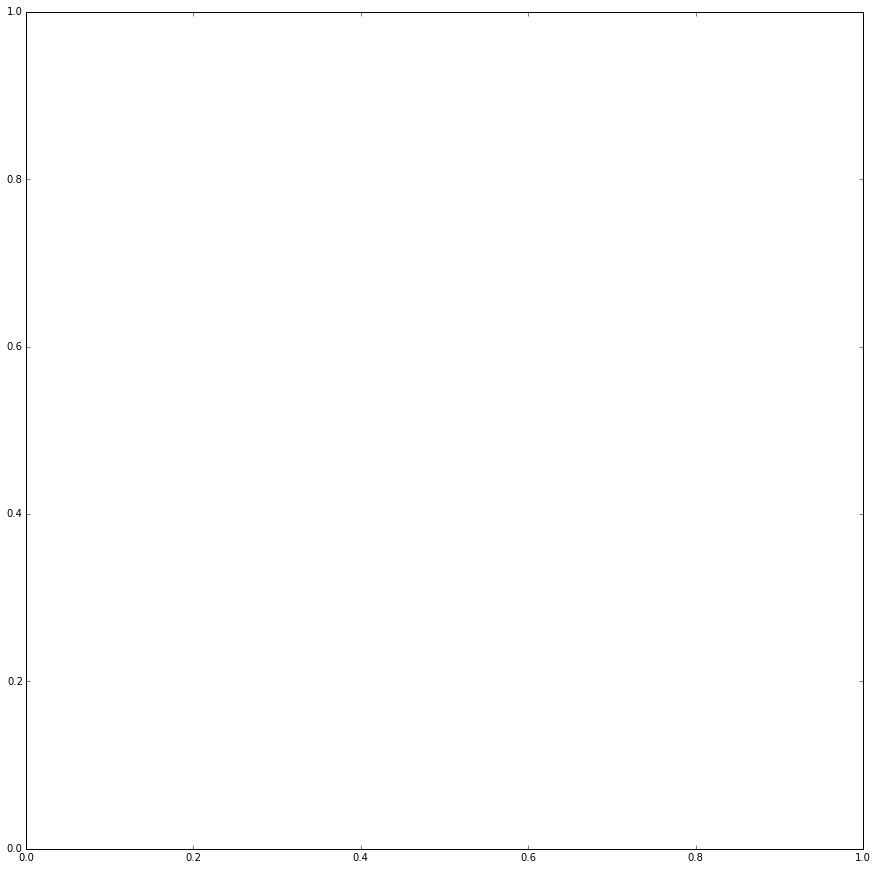

In [38]:
with open('CheckerForCanon_2-swathe.bmp', 'rb') as f:
    CheckerForCanon = f.read()
plot_imgs([(CheckerForCanon, 'CheckerForCanon')], max_cols = 2, fig_size=15)

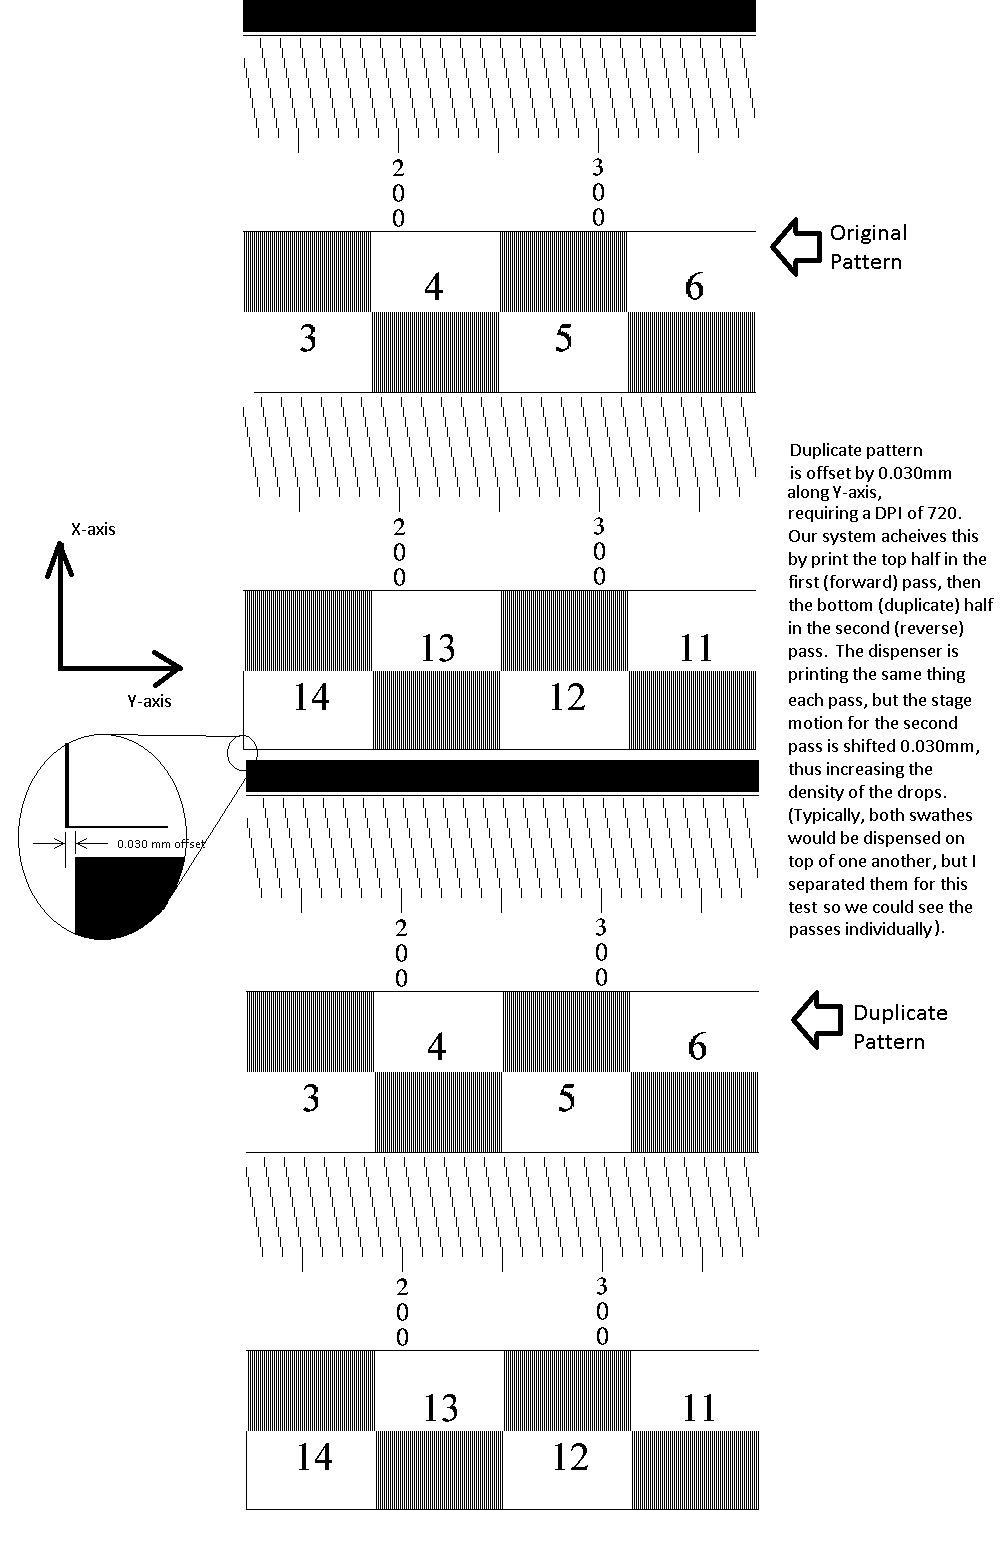

In [40]:
from IPython.display import Image
Image(filename='CheckerForCanon_2-swathe.png') 

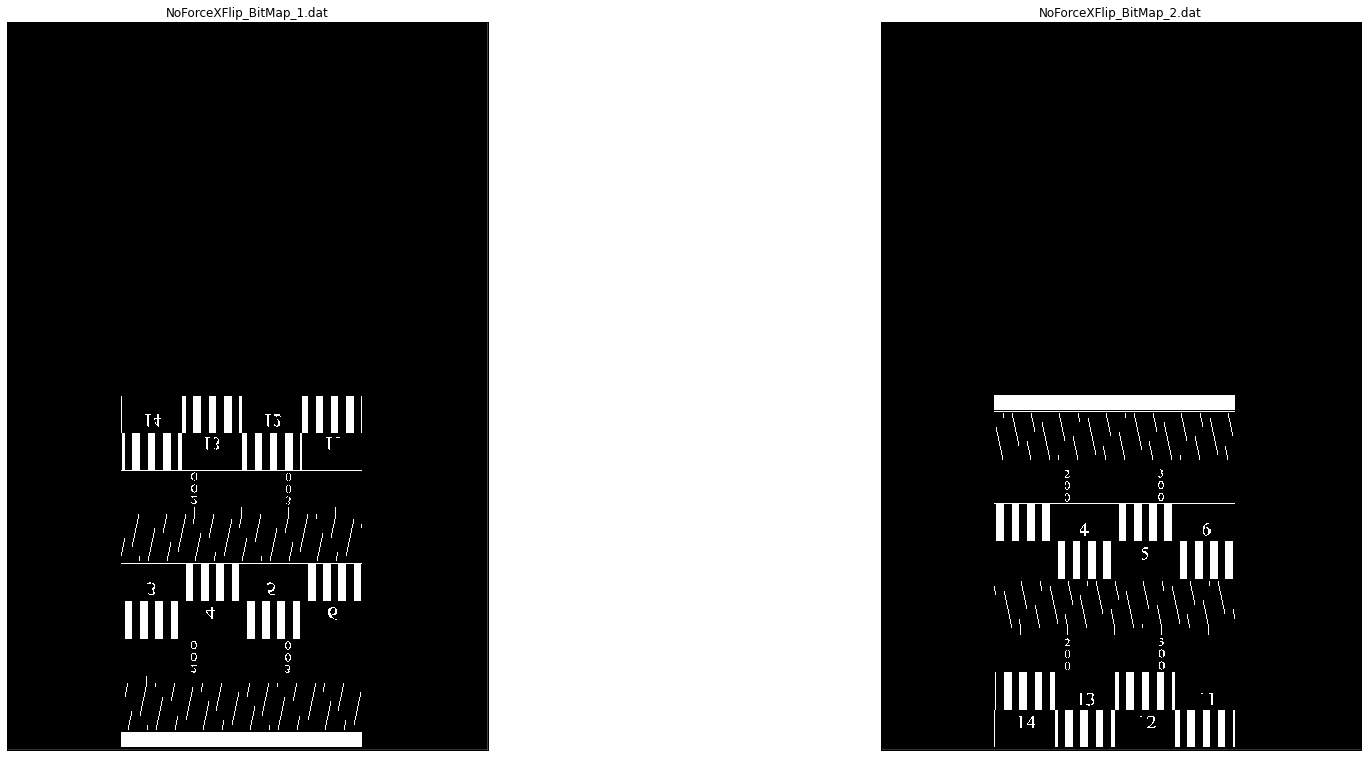

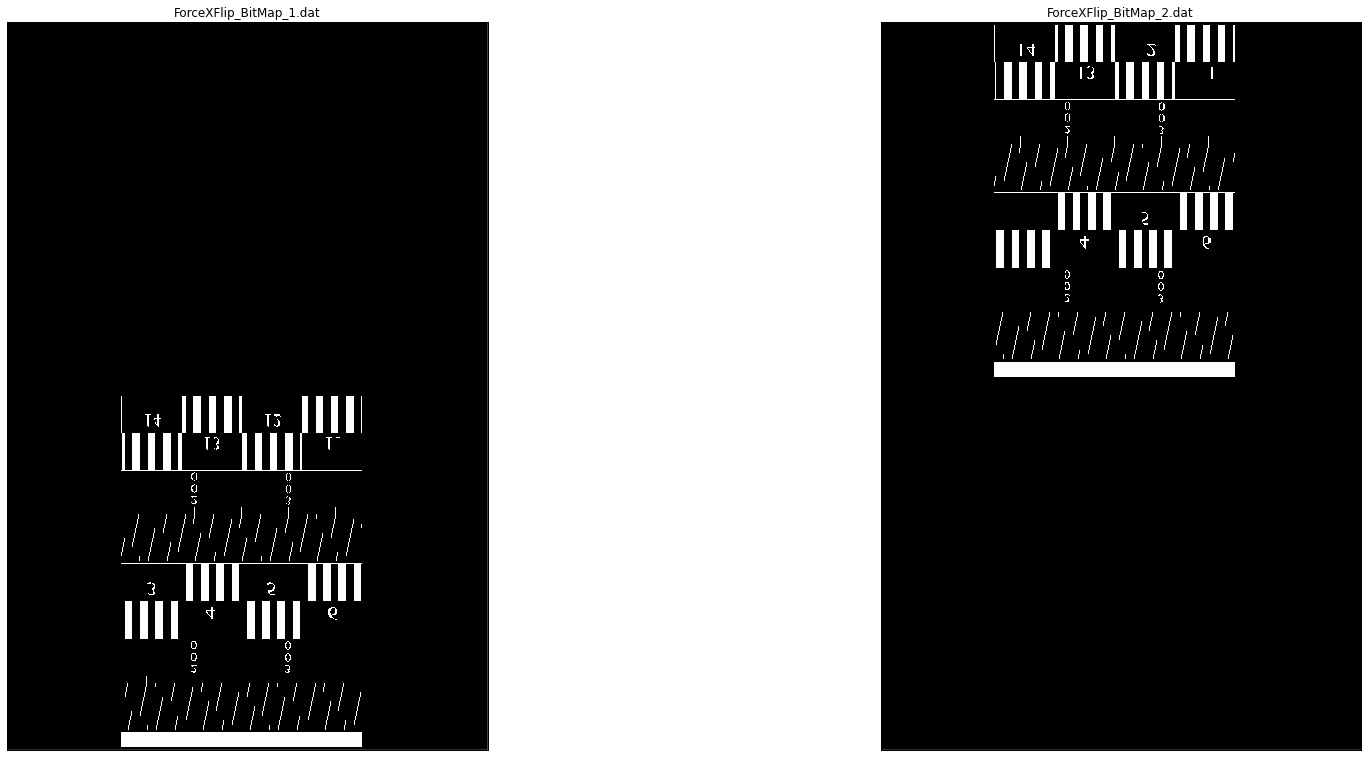

In [33]:
plot_imgs(uncompressedBMP_lst, max_cols = 2, fig_size=15)

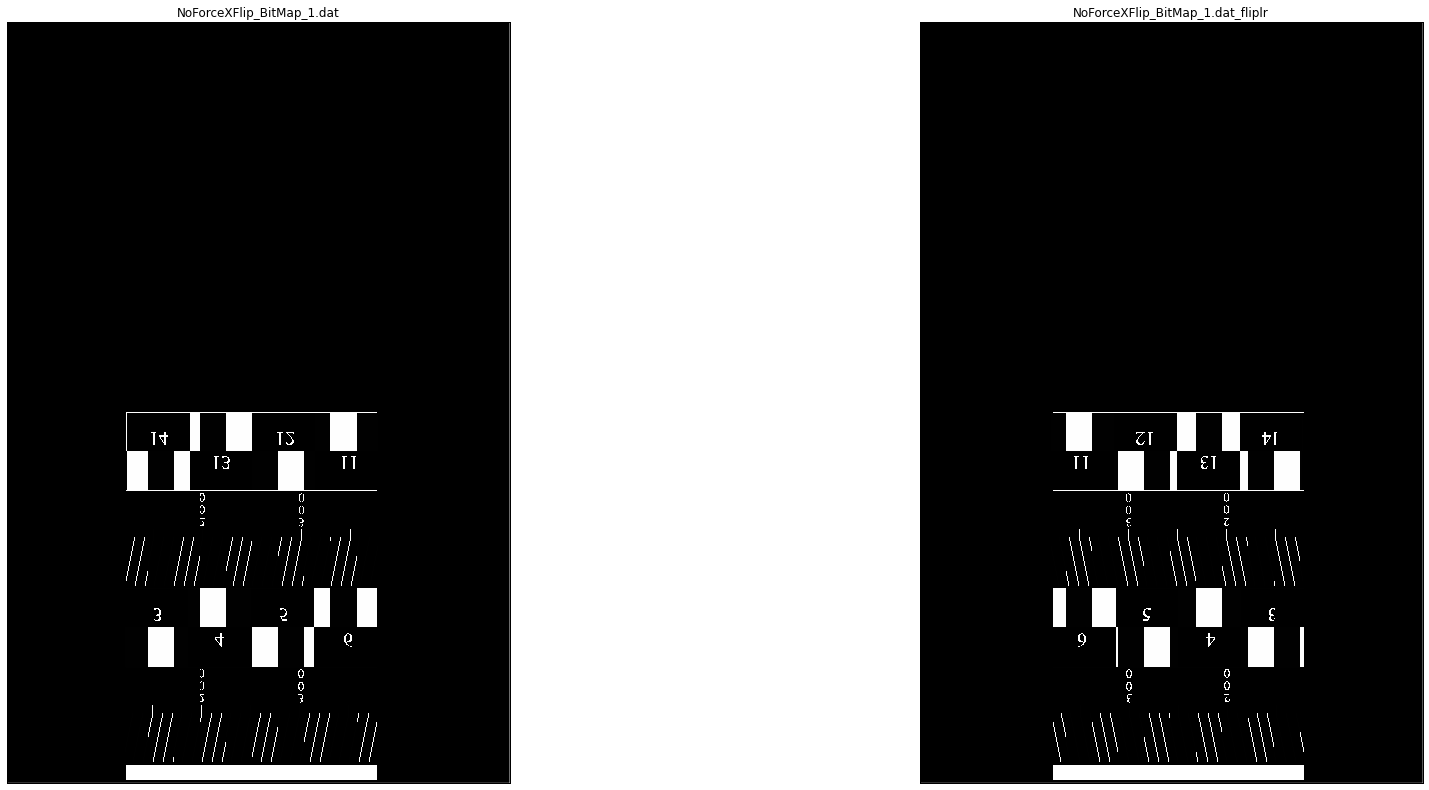

In [27]:
bmp_lst = uncompressedBMP_lst
lst = [(bmp_lst[0][0], bmp_lst[0][1]), (np.fliplr(bmp_lst[0][0]), bmp_lst[0][1] + '_fliplr') ]
plot_imgs(lst, max_cols = 2, fig_size=15)

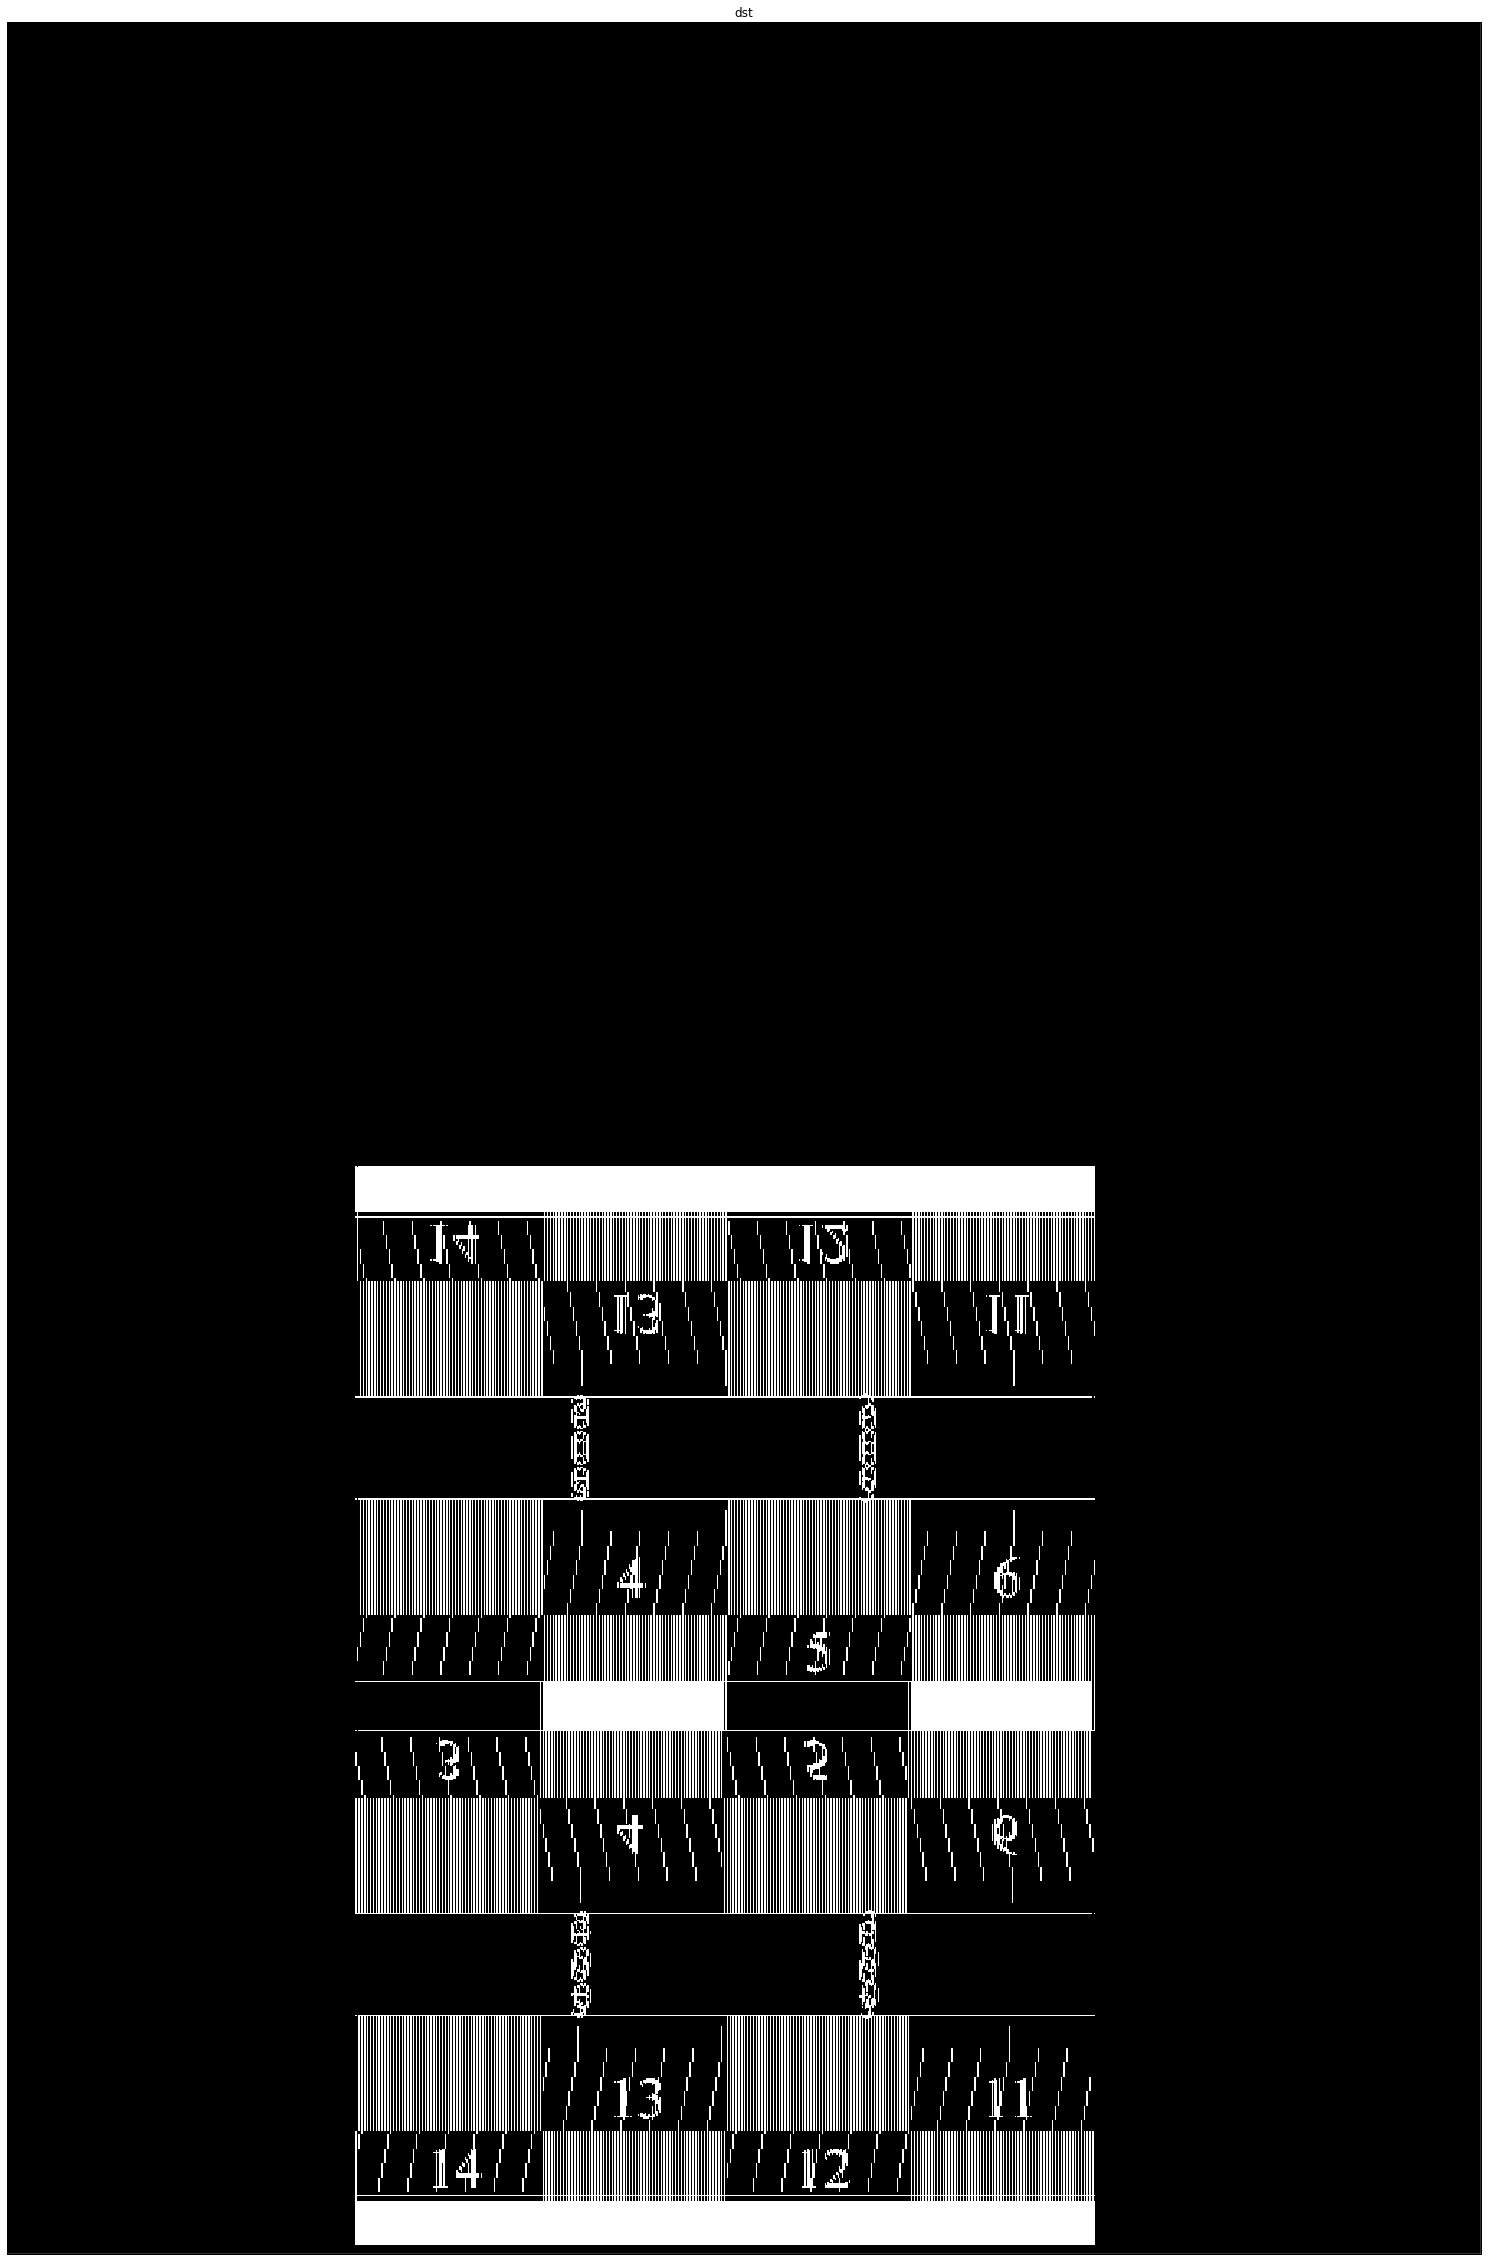

In [42]:
dst = cv2.add(uncompressedBMP_lst[2][0],np.flipud(uncompressedBMP_lst[3][0]))
# cv2.imwrite("1.bmp", uncompressedBMP_lst[0][0])
# cv2.imwrite("2.bmp", uncompressedBMP_lst[1][0])
plot_imgs([(dst, 'dst')], max_cols = 2, fig_size=40)
# cv2.imwrite("dst.bmp", dst)

In [9]:
d = 0b10011101
d
for x in range(0,8):
    print("%d" % ((d >> x) & 0x01))

1
0
1
1
1
0
0
1
